# Questions

<img src="Images/1200px-University_of_Tehran_logo.svg.png" width="100" style="float:left;"/>

<img src="Images/fanni.png" width="120" style="float:right;position: relative;top: -25px;"/>


<h1 style="float:center;" align="center">Computer Assignment 3</h1>
<h3 style="float:center;" align="center"><b> Ali Javidan ( 810896047 ) </b></h3>

The goal of this computer assignment is to get more familiar with the Naive Bayes Classification. This algorithm help us to classify between different categories easily. In this CA we want to classify different news categories.

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk.corpus
nltk.download('stopwords')
from __future__ import unicode_literals
from hazm import *

pd.set_option('mode.chained_assignment', None)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First, we read the data from .csv file and check the data info.

In [2]:
fields=['recommend', 'comment']
data = pd.read_csv('comment_train.csv', usecols=fields)
data.head()

,comment,recommend
0,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,recommended
2,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   comment    6000 non-null   object
 1   recommend  6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB


# Data Preprocessing
Next step in each ML problem is to clean data and prepare it for making the best usage of it. Here I define a `normalize` function which clean data. First I delete stop words from the dataset. Stop words are the words which are very common in arabic language and also they don't have any specific meaning. Then I tokenize sentences and run the lemmatizer and stemmer method on the words.
## Stemming
Stemming is the process of reducing inflection in words to their root forms such as mapping a group of words to the same stem even if the stem itself is not a valid word in the Language.

## Lemmatization
Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

At the end I remove unneeded columns.

## 1. Lemmatization and Stemming differences

As is shown in the below diagram, There is not any huge difference between using Stemming and Lemmatization here in our data set.

| Lemmatization, Additive Smoothing Included | Stemming, Additive Smoothing Included |
| --- | --- | --- |
| <img src="Images/.png" width="300px"/> | <img src="Images/STEMMING.PNG" width="300px"/> |

| None of Stemming and Lemmatization, Additive Smoothing Included |
| --- | --- |
| <img src="Images/NONE_OF_STEMMING_AND_LEMMATIZATION.PNG" width="300px"/>  |

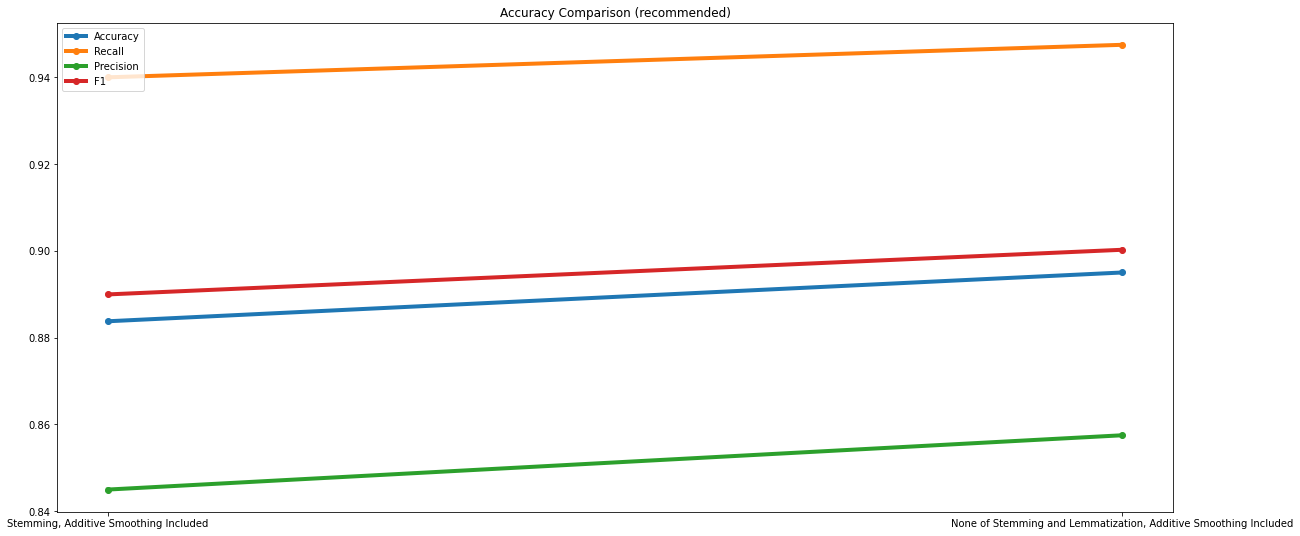

In [15]:
import matplotlib.pyplot as plt

accuracy = [0.88375, 0.895]
recall = [0.94, 0.9475]
precision = [0.844944, 0.857466]
F1 = [0.889941 ,0.900238]
x = ["Stemming, Additive Smoothing Included", "None of Stemming and Lemmatization, Additive Smoothing Included"]
line_width = 4

plt.figure(figsize=(20, 9))
plt.plot(x, accuracy, '-o', label="Accuracy", linewidth=line_width)
plt.plot(x, recall, '-o', label="Recall", linewidth=line_width)
plt.plot(x, precision, '-o', label="Precision", linewidth=line_width)
plt.plot(x, F1, '-o', label="F1", linewidth=line_width)

plt.title("Accuracy Comparison (recommended)")
plt.legend(loc="upper left")
plt.show()

In [4]:
def word_stemmer(text):
    stem_text = [Stemmer().stem(i) for i in text]
    return stem_text

def word_lemmatizer(text):
    lem_text = [Lemmatizer().lemmatize(i) for i in text]
    return lem_text

def normalize(data):
    stop_words = stopwords.words('arabic')

    # data['clean_data'] = data['comment'].apply(lambda elem: re.sub(r"\d+", "", elem))
    # data['clean_data'] = data['clean_data'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
    data['clean_data'] = data['comment']
    data['text_tokens'] = data['clean_data'].apply(lambda x: word_tokenize(x))
    # data['text_tokens'] = data['text_tokens'].apply(lambda x: word_lemmatizer(x)) 
    # data['text_tokens'] = data['text_tokens'].apply(lambda x: word_stemmer(x))
    data = data.drop(columns=['comment', 'clean_data'])
    
    return data


data = normalize(data)
data.head()

,recommend,text_tokens
0,not_recommended,"[با, وجود, سابقه, خوبی, که, از, برند, ایرانی, ..."
1,recommended,"[بسیار, عالی]"
2,not_recommended,"[من, الان, ۳, هفته, هست, استفاده, میکنم\r, برا..."
3,not_recommended,"[عمرش, کمه, تا, یه, هفته, بیشتر, نمیشه, استفاد..."
4,not_recommended,"[فکر, کنین, کلمن, بخرین, با, ذوق, ., کلی, پولش..."


# Naive Bayes
I use bag of words method for calculating probabilities of the problem. In my algorithm, each distinct word is considered a feature.

Bayesian probability consists of 4 parts:
* Prior
* Posterior
* Likelihood
* Evidence

$$P(recommend|W_0, W_1, W_2, ...,  W_n) = \frac{P(recommend)P(W_0, W_1, W_2, ...,  W_n|recommend)}{P(W_0, W_1, W_2, ...,  W_n)}$$

# 2.

**Prior** is the probability of each class in general, this means how probable it is for a news to be in a certain class in general not considering any other data. In order to calculate the prior, for each class, we divide the number of that class comments by the number of all given comments.
 
**Likelihood** is the probability of each word of a comment given the class. In Naive Bayes, each feature is independent of others, so this is the multiplication of the probabilities of each word given the class. This means how probable it is for a certain class to use that word. To calculate this, we multiply the probabilities of each word given the class. The probaility of each word given the class is the number of times that word is used in that class divided by the total number of words in that class.

**Evidence** is the probabiliy of all words that we have in a given comment. We do not need to calculate this as it is the same for each class and does not change the result of comparison. If we wanted to calculate this, we could multiply the probabilites of all words. The probability of each word is the number of its occurance divided by the count of all words.

**Posterior** is the probaility of a class given the words in a comment. We use bayesian rule stated below to calculate this.

$$ P(c|X) = P(c)\times\prod_{i=1}^{n} P(x_i|c) $$

## Additive Smoothing
If a word is used only in one class, the probability of it given the other class, will be zero and as we multiply the probabilities, the result will be zero not considering any other features.

In order to fix this, we add a fixed alpha to the count of all words in its class and add count * alpha to the denominator.

In [5]:
def find_probability(data):

    words = []
    for text in data['text_tokens']:
        words += text
    words = list(set(words))

    recommended_data = data[data['recommend'] == "recommended"].text_tokens
    not_recommended_data = data[data['recommend'] == "not_recommended"].text_tokens

    recommended_words = []
    for text in recommended_data:
        recommended_words += text

    not_recommended_words = []
    for text in not_recommended_data:
        not_recommended_words += text
    
    data_all_word_count = pd.DataFrame(columns=['recommended_count', 'not_recommended_count'])
    for word in words:
        data_all_word_count = data_all_word_count.append({'word': word, 'recommended_count': recommended_words.count(word), 'not_recommended_count': not_recommended_words.count(word)}, ignore_index=True)
        
    data_all_word_count = data_all_word_count.set_index('word')

    alpha = 1
    data_all_word_count['recommended_prob'] = (data_all_word_count['recommended_count'] + alpha) / (len(recommended_words) + (len(set(recommended_words + not_recommended_words))* alpha))
    data_all_word_count['not_recommended_prob'] = (data_all_word_count['not_recommended_count'] + alpha) / (len(not_recommended_words) + (len(set(recommended_words + not_recommended_words))* alpha))
    # data_all_word_count['recommended_prob'] = (data_all_word_count['recommended_count']) / (len(recommended_words) + (len(set(recommended_words + not_recommended_words))))
    # data_all_word_count['not_recommended_prob'] = (data_all_word_count['not_recommended_count']) / (len(not_recommended_words) + (len(set(recommended_words + not_recommended_words))))

    return  data_all_word_count

data_all_word_count = find_probability(data)
data_all_word_count.head()

,recommended_count,not_recommended_count,recommended_prob,not_recommended_prob
word,,,,
وج,0,1,0,8.17521e-06
کیت,1,1,7.33326e-06,8.17521e-06
زیباس\r,1,0,7.33326e-06,0
داره-آریتمی,1,0,7.33326e-06,0
ندادم,0,2,0,1.63504e-05


# **Final Evaluation**

Now we try our trained data for evaluating the real samples.

In [6]:
fields=['comment', 'recommend']
evaluation_test = pd.read_csv('comment_test.csv', usecols=fields)
evaluation_test.head()

,comment,recommend
0,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended


In [7]:
evaluation_test = evaluation_test.dropna()
evaluation_test.head()

,comment,recommend
0,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended


In [8]:
evaluation_test = normalize(evaluation_test)
evaluation_test.head()

,recommend,text_tokens
0,recommended,"[تازه, خریدم, یه, مدت, کار, بکنه, مشخص, میشه, ..."
1,not_recommended,"[با, این, قیمت, گزینه, های, بهتری, هم, میشه, گ..."
2,recommended,"[خیلی, عالیه, ،, فقط, کاش, از, اون, سمتش, میشد..."
3,not_recommended,"[من, این, فیس, براس, چند, روز, یپش, به, دستم, ..."
4,recommended,"[بنده, یه, هارد, اکسترنال, دارم, که, کابل, فاب..."


In [9]:
def prediction(test, data, data_all_word_count):

    words = []
    for text in data['text_tokens']: 
        words += text
    words = list(set(words))
    
    recommended_data = data[data['recommend'] == "recommended"].text_tokens
    not_recommended_data = data[data['recommend'] == "not_recommended"].text_tokens

    for index, row in test.iterrows(): 
        curr_recommended_prob = len(recommended_data) / (len(recommended_data) + len(not_recommended_data))
        curr_not_recommended_prob = len(not_recommended_data) / (len(recommended_data) + len(not_recommended_data))
        for word in row["text_tokens"]:
            if word in words:
                curr_recommended_prob *= data_all_word_count.at[word, 'recommended_prob']
                curr_not_recommended_prob *= data_all_word_count.at[word, 'not_recommended_prob']
        if curr_recommended_prob >= curr_not_recommended_prob:
          test.at[index, 'prediction'] = 'recommended'
        elif curr_not_recommended_prob >= curr_recommended_prob:
          test.at[index, 'prediction'] = 'not_recommended'
    
    return test

In [10]:
result = prediction(evaluation_test, data, data_all_word_count)
result.head()

,recommend,text_tokens,prediction
0,recommended,"[تازه, خریدم, یه, مدت, کار, بکنه, مشخص, میشه, ...",not_recommended
1,not_recommended,"[با, این, قیمت, گزینه, های, بهتری, هم, میشه, گ...",not_recommended
2,recommended,"[خیلی, عالیه, ،, فقط, کاش, از, اون, سمتش, میشد...",recommended
3,not_recommended,"[من, این, فیس, براس, چند, روز, یپش, به, دستم, ...",recommended
4,recommended,"[بنده, یه, هارد, اکسترنال, دارم, که, کابل, فاب...",recommended


In [11]:
def evaluation(input_test):
    input_test['correct'] = (input_test['recommend'] == input_test['prediction'])
    correct_count = (input_test['correct']).sum()
    accuracy = correct_count / len(input_test)

    correct_recommended = (input_test.loc[(input_test['recommend'] == 'recommended') & input_test['correct']].correct).sum()
    all_recommended = (input_test['recommend'] == 'recommended').sum()
    all_recommended_detected = (input_test['prediction'] == 'recommended').sum()
    
    recommended_precision = correct_recommended / all_recommended_detected
    recommended_recall = correct_recommended / all_recommended

    correct_not_recommended = (input_test.loc[(input_test['recommend'] == 'not_recommended') & input_test['correct']].correct).sum()
    all_not_recommended = (input_test['recommend'] == 'not_recommended').sum()
    all_not_recommended_detected = (input_test['prediction'] == 'not_recommended').sum()
    
    not_recommended_precision = correct_not_recommended / all_not_recommended_detected
    not_recommended_recall = correct_not_recommended / all_not_recommended

    table = pd.DataFrame([], index=['Recall','Precision', 'Accuracy', 'F1'], columns=['recommended', 'not_recommended'])
    table.loc['Recall']['recommended'] = recommended_recall
    table.loc['Recall']['not_recommended'] = not_recommended_recall
    table.loc['Precision']['recommended'] = recommended_precision
    table.loc['Precision']['not_recommended'] = not_recommended_precision
    table.loc['Accuracy'] = accuracy
    table.loc['F1']['recommended'] = 2*(recommended_recall * recommended_precision) / (recommended_recall + recommended_precision)
    table.loc['F1']['not_recommended'] = 2*(not_recommended_recall * not_recommended_precision) / (not_recommended_recall + not_recommended_precision)
    return table
    

table = evaluation(result)
table

,recommended,not_recommended
Recall,0.9575,0.7925
Precision,0.821888,0.949102
Accuracy,0.875,0.875
F1,0.884527,0.86376


## 7.

| None of Additive Smoothing and Preprocessing | Just Additive Smoothing, no Preprocessing |
| --- | --- | --- |
| <img src="Images/NONE_OF_ADDTIVIE_SMOOTHING_AND_PREPROCESSING.PNG" width="300px"/> | <img src="Images/NONE_OF_STEMMING_AND_LEMMATIZATION.PNG" width="300px"/> |

## 8.


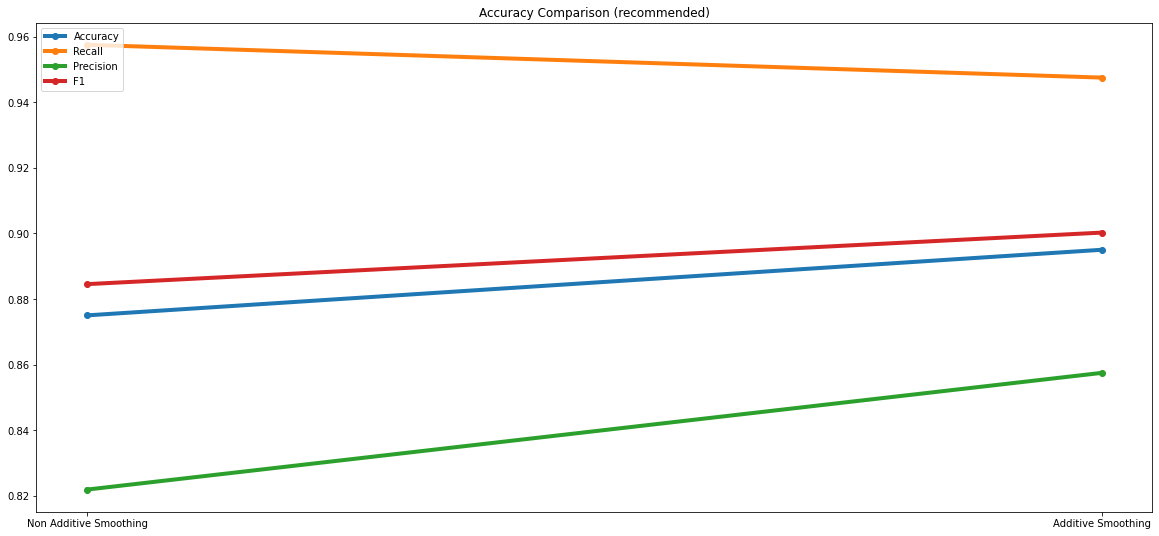

In [16]:
import matplotlib.pyplot as plt

accuracy = [0.875, 0.895]
recall = [0.9575, 0.9475]
precision = [0.821888, 0.857466]
F1 = [0.884527 ,0.900238]
x = ["Non Additive Smoothing", "Additive Smoothing"]
line_width = 4

plt.figure(figsize=(20, 9))
plt.plot(x, accuracy, '-o', label="Accuracy", linewidth=line_width)
plt.plot(x, recall, '-o', label="Recall", linewidth=line_width)
plt.plot(x, precision, '-o', label="Precision", linewidth=line_width)
plt.plot(x, F1, '-o', label="F1", linewidth=line_width)

plt.title("Accuracy Comparison (recommended)")
plt.legend(loc="upper left")
plt.show()

## Questions


## 3, 4. What if we just have one sample of one word in our train data set?

If this situation happen, the probability of one class become zero because it multiply with 0. I have considered this matter and solve it with `Additive Smoothing` method.

## 5. What if we just consider one of precision or recall in the machine learning problem?

If we only use precision for model evaluation, we can get a 100 percent precision if we manage to correctly guess only one comment of the corresponding class, and predict the other class for all other given comments.

$$ Precision = \frac{True Positive}{True Positive + False Positive} $$
$$ Recall = \frac{True Positive}{True Positive + False Negative} $$

## 6. What’s the deal with F1?

False positives and false negatives can be absolutely crucial to the study, while true negatives are often less import. The F1 score tries to take this into account, giving more weight to false negatives and false positives while not letting large numbers of true negatives influence score.

$$ F1 = 2*\frac{Precision * Recall}{Precision + Recall} $$